In [2]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 10)

# 1.1 Reading data from a csv file

We're going to be looking some cyclist data from Montréal. Here's the [original page](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (in French), but it's already included in this repository. We're using the data from 2012.

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

Load the dataset bike.csv using `read_csv`. As you can see several parameters are available.


In [3]:
pd.read_csv('static/bikes.csv', encoding='latin1')

,ï»¿Date;Berri 1;BrÃ©beuf (donnÃ©es non disponibles);CÃ´te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donnÃ©es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;
3,04/01/2012;144;;1;116;318;111;8;61;
4,05/01/2012;197;;2;124;330;97;13;95;
...,...
305,01/11/2012;2405;;1208;1701;3082;2076;165;2461
306,02/11/2012;1582;;737;1109;2277;1392;97;1888
307,03/11/2012;844;;380;612;1137;713;105;1302
308,04/11/2012;966;;446;710;1277;692;197;1374


In [4]:
pd.read_csv('static/bikes.csv', nrows=3)

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;



Select the first 3 rows using the same mechanism as numpy row selection

In [5]:
pd.read_csv('static/bikes.csv', nrows=3, sep=";", dayfirst=True, parse_dates=['Date'],index_col="Date")

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


You'll notice that this it was not properly loaded : all columns collapsed into one. We will use options of  `read_csv` to fix that

* change the column separator to a `;` with the `sep` option
* Parse the dates in the 'Date' column using `parse_date`
* Tell it that our dates have the day first instead of the month first
* Set the index to be the 'Date' column with `index_col`

# 1.2 Selecting a column

You can select a column (or several) like a dictionnary juste put the name of the column between a brack : 
`df['column_name']` or `df[['col1', 'col2', etc]]`

In [6]:
df = pd.read_csv('static/bikes.csv', nrows=3, sep=";", dayfirst=True, parse_dates=['Date'],index_col="Date")
dates = df["Rachel1"]
dates.head()

Date
2012-01-01    16
2012-01-02    43
2012-01-03    58
Name: Rachel1, dtype: int64

# 1.3 Plotting a column

Plot the the column using  `.plot()` 

We can see that, unsurprisingly, not many people are biking in January, February, and March, 

<AxesSubplot:xlabel='Date'>

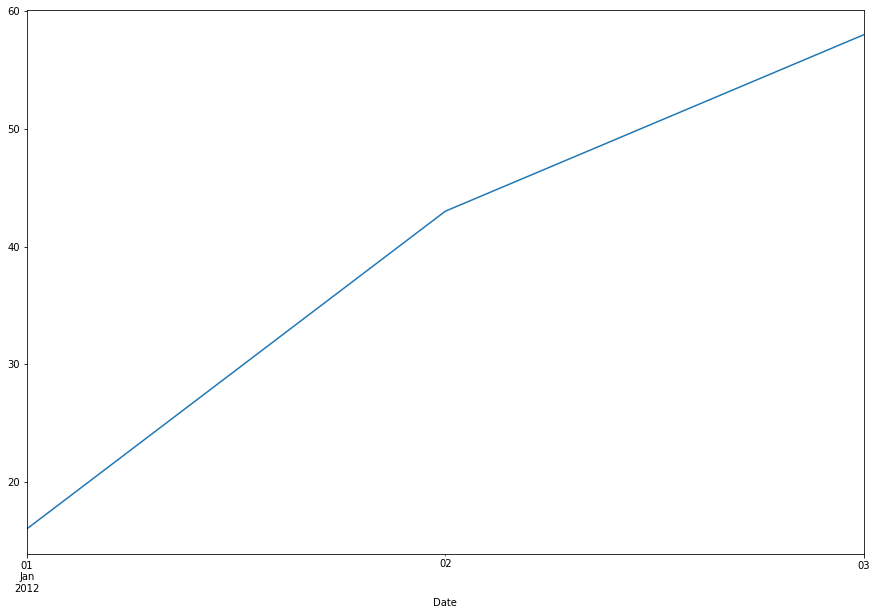

In [7]:
dates.plot()

We can also plot all the columns of dataframe using the same mechanism. 

<AxesSubplot:xlabel='Date'>

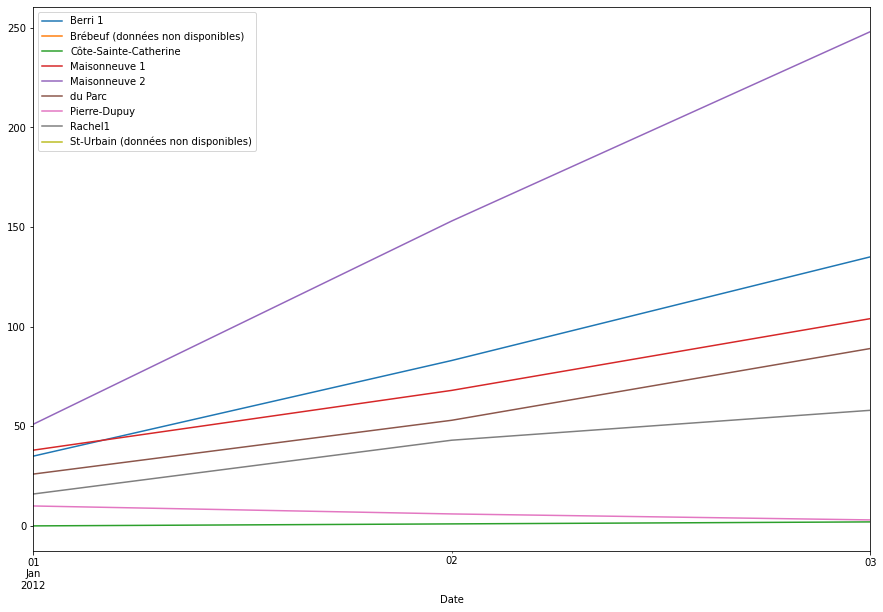

In [8]:
df.plot()

However it is a bit cluttered as you can see. Plot it again using the `subplots=True` parameter

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

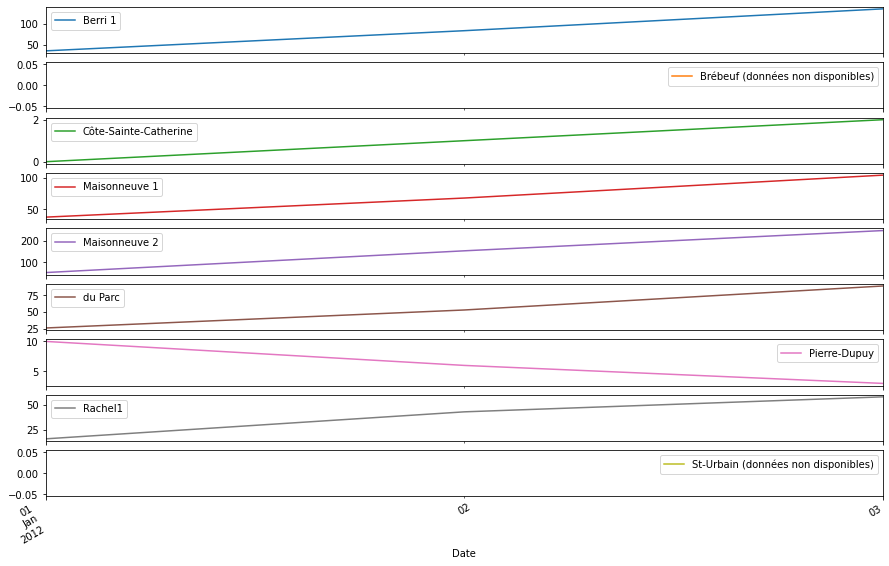

In [9]:
df.plot(subplots=True)

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  